# Lab 6

In this lab, we will use neural networks to perform semantic segmentation on an image. The goal of semantic segmentation is to classify each pixel in an image into an object class. In the example shown below, we want to segment the person and animals.

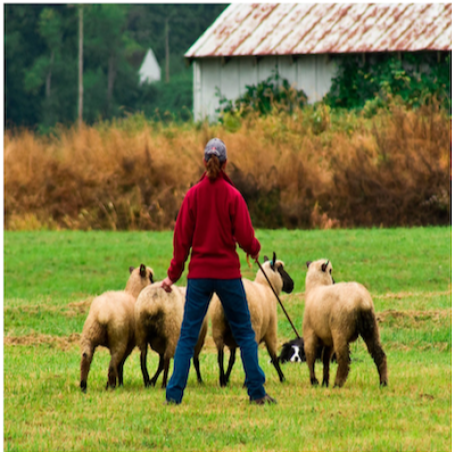

In [8]:
from IPython.display import Image
Image(filename='original_image.png')

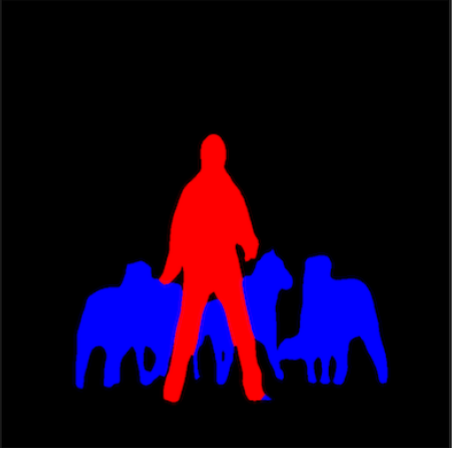

In [9]:
Image(filename='segmented_image.png')

## Inputs and outputs for semantic segmentation
Similar to image classification models, semantic segmentation approaches generally expects three-channeled images as inputs. For an input image of height H and width W, the output prediction of the model will have dimensions of (H, W, C) where C is the number of object classes in the dataset vocabulary. The output contains C channels for each pixels which can be thought of as prediction scores for each class. We begin by importing a pretrained model. Remember to preprocess the input image by normalizing the pixel values using ImageNet default values (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]).

In [10]:
from PIL import Image as pil_image
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as T
from torchvision import models

################ Implement image transform ################
image_transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]) # resize. renormalize an PIL image

fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

We will implement a function to use the pretrained model to generate a prediction for the image.

In [36]:
def generate_segmentation(model, image_transform, input_img):
    ################ Implement forward pass for inference ################
    '''
    Inputs:
    - model: segmentation model
    - image_transform: torchvision transforms
    - input_img: input image with dimensions (H x H x 3)

    Outputs:
    - segmented_img: the segmented img is in the form of a numpy array with the dimensions (1 x C x H x W)
    '''
    # [B, C, H, W]
    # [1, ]
    # (H, H, 3) => (3, H(224), H(224))

    # renormalize the image using image_transform
    img = image_transform(input_img)
    img = img.unsqueeze(0)
    pred = model(img)['out']
    return pred

Now, we will implement a function to convert the output prediction of your model into an RGB image for ease of visualizations. We begin by defining a color mapping for each object class.

In [24]:
label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

Implement a function to decode the output prediction.

In [34]:
def decode_predictions(predictions):
    ################ Implement function to map output predictions to a segmented image ################
    '''
    Inputs:
    - predictions: output of semantic segmentation model with the dimensions (C x H x W)

    Outputs:
    - segmented_img: the segmented img is in the form of a numpy array with the dimensions (H x W x 3) R, G, B
    '''
    # [B, C, H, W] [1, 21, 224, 224]
    # (C, H, W) | c -> classes | 21

    # Use Torch.argmax -> return the index at which the max exist | argmax(preds, dim = 0)
    # find the label from the predictions array
    pred = predictions.squeeze(0)
    pred = torch.argmax(pred, dim = 0) #scalar
    output_img = label_colors[pred] # Apply to each pixel values

    # use label_colors to generate a visualized seg map

    return output_img

Finally, implement the end-to-end segment function that calls your previously implemented 'generate_segmentation' and 'decode_predictions' functions on an input image.

In [26]:
import sys
def segment(model, image_transform, input_image_path):
    ################ Implement a general segment function ################
    '''
    Inputs:
    - input_image_path: path to load input image for segmentation

    Outputs:
    - segmented_img: the segmented img is in the form of a numpy array with the dimensions (H x W x 3)
    '''

    # read the image using input_image_path
    input_image = pil_image.open(input_image_path)

    # run the segmentation model (call generate_segmentation) -> predictions -> call decode_predictions() -> rgb image
    prediction = generate_segmentation(fcn, image_transform, input_image)
    output_img = decode_predictions(prediction)
    segmented_img = output_img
    return segmented_img

To test your implemented functions, use the provided image path below and plot your segmented image.

In [37]:
input_image_path = './input_image.jpeg'

segmented_img = segment(fcn, image_transform, input_image_path)

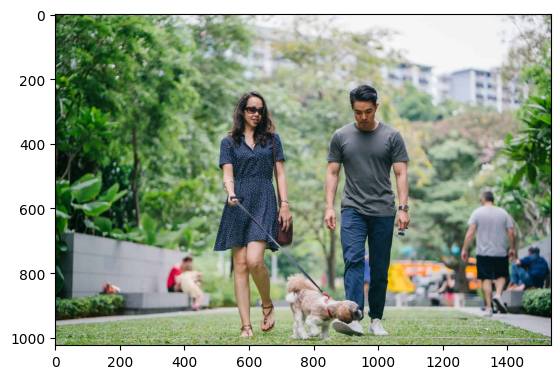

In [30]:
plt.imshow(pil_image.open(input_image_path))
plt.show()

In [ ]:
################ Plot your segmented image ################

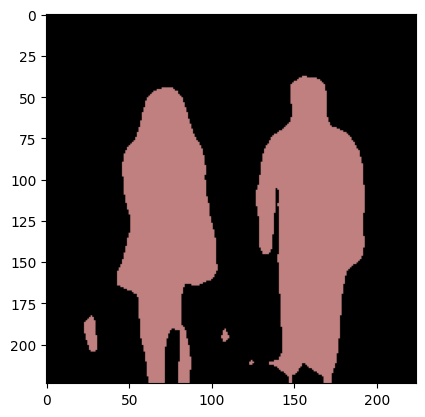

In [38]:
plt.imshow(segmented_img)
plt.show()